# Pymaceutical Drug Trials for the Reduction of Tumor Volume in Mice.
---

In [83]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import os

# Read in the mouse data and study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the two into a single df
complete_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Visualise the df
complete_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


# Clean The Data

In [84]:
# Gets general df information.
# Note the number of rows, as that will change once duplicatates are identified and removed.
complete_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [85]:
# Checks the number of unique mice in the study.
total_mice = len(mouse_metadata["Mouse ID"].unique())
total_mice

249

In [86]:
# Gathers duplicate data (duplicate data will be identified by duplicate time points, paired with the mouse ID)
# This means that two measurments were taken for the same mouse at the same timepoint.
# Shows the mouse ID(s) associated with the duplicate data.
duplicates = complete_results.loc[complete_results.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(duplicates)

['g989']


In [87]:
# Further analyzes all data for the duplicate mouse ID.
all_g989_data = complete_results.loc[complete_results['Mouse ID'] == 'g989']

# Each timepoint is duplicated, with different tumor volume data. This mouse's data is unusable.
print(all_g989_data.count())
all_g989_data

Mouse ID              13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [88]:
# Creates a clean df by dropping the duplicate mouse by its ID.
# Note the the number of rows decreased by the mumber of rows that included data for mouse g989.
complete_results_cleaned = complete_results[complete_results['Mouse ID'].isin(duplicates) == False]
complete_results_cleaned.count()

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [89]:
# Checks the number of mice in the clean DataFrame.
# Should be 249 - 1
total_mice_cleaned = len(complete_results_cleaned["Mouse ID"].unique())
total_mice_cleaned

248

In [90]:
# Exports the cleaned df to a CSV file in the 'cleaned_data' folder
os.makedirs('data/cleaned_data', exist_ok=True)
complete_results_cleaned.to_csv('data/cleaned_data/cleaned_data.csv', index=False)

## Test for Generated Data

In [91]:
# Q: How precise is the Weight (g) series?
# A: The series is precise only to a whole number, or integer.
weights = complete_results_cleaned['Weight (g)'].unique()
print("Recorded weights across full dataset:")
np.sort(weights)
print(np.sort(weights))

# Get value counts per weight
print("")
weights_count = complete_results_cleaned['Weight (g)'].value_counts().sort_values()
print("Number of recorded weights across full dataset:")
weights_count

Recorded weights across full dataset:
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]

Number of recorded weights across full dataset:


18     10
15     10
24     26
20     27
22     30
23     33
16     40
19     60
21     66
17    115
27    217
28    232
26    241
29    249
30    253
25    271
Name: Weight (g), dtype: int64

In [52]:
# Q: How precise is the Age_month series?
# A: The series is precise only to a whole number, or integer.
ages = complete_results_cleaned['Age_months'].unique()
print("Recorded weights across full dataset:")
np.sort(ages)
print(np.sort(ages))

# Get value counts per weight
print("")
ages_count = complete_results_cleaned['Age_months'].value_counts().sort_values()
print("Number of recorded ages across full dataset:")
ages_count

Recorded weights across full dataset:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]

Number of recorded ages across full dataset:


15     37
14     48
10     53
6      54
16     58
12     58
1      60
5      63
13     69
19     69
11     71
4      74
9      74
24     78
17     79
22     83
2      87
7      95
20    100
21    103
23    106
3     107
18    112
8     142
Name: Age_months, dtype: int64

In [92]:
# Determine if the Weight per mouse EVER changes
weight_change_df = complete_results_cleaned.groupby('Mouse ID')['Weight (g)'].agg(['max', 'min'])
# If The length of the dataframe is 248 (it is) this indicates that there are no records that indicate
# a change in mouse AGE from the beginning of the trial to the end.
print(len(weight_change_df))
print(weight_change_df.info())


248
<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, a203 to z969
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   max     248 non-null    int64
 1   min     248 non-null    int64
dtypes: int64(2)
memory usage: 5.8+ KB
None


In [27]:
# Determine if the Weight per mouse EVER changes
age_change_df = complete_results_cleaned.groupby('Mouse ID')['Age_months'].agg(['max', 'min'])
# If The length of the dataframe is 248 (it is) this indicates that there are no records that indicate
# a change in mouse AGE from the beginning of the trial to the end.
print(len(age_change_df))
print(age_change_df.info())
age_change_df

248
<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, a203 to z969
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   max     248 non-null    int64
 1   min     248 non-null    int64
dtypes: int64(2)
memory usage: 5.8+ KB
None


,max,min
Mouse ID,,
a203,20,20
a251,21,21
a262,17,17
a275,20,20
a366,16,16
...,...,...
z435,12,12
z578,11,11
z581,24,24


In [93]:
# Gather the first recorded tumor volume of each mouse across each treatment regimen:
# If all starting tumor volumes are the same (they are) this is generated data.  

# Getting the first (least) timepoint for each mouse
first_timepoint = complete_results_cleaned.groupby('Mouse ID')['Timepoint'].min()

# Merging this grouped df with the original complete_results_cleaned df to get the tumor volume at the first timepoint
complete_with_first_tumor_v = pd.merge(first_timepoint, complete_results_cleaned, on=['Mouse ID','Timepoint'])
complete_with_first_tumor_v


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.0,0,Infubinol,Female,20,23
1,a251,0,45.0,0,Infubinol,Female,21,25
2,a262,0,45.0,0,Placebo,Female,17,29
3,a275,0,45.0,0,Ceftamin,Female,20,28
4,a366,0,45.0,0,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,0,45.0,0,Propriva,Female,12,26
244,z578,0,45.0,0,Ramicane,Male,11,16
245,z581,0,45.0,0,Infubinol,Female,24,25
246,z795,0,45.0,0,Naftisol,Female,13,29


## Summary Statistics

In [53]:
# Groups the data, then aggregate the values of the Tumor Volume (3mm) series by average, median, etc.
tumor_aggregate = complete_results_cleaned.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
# Formats
tumor_aggregate = tumor_aggregate.style.format("{:.3f}")

# Visualize summary
tumor_aggregate

## Visualizations

In [54]:
# Creates a folder for exported chart images.
os.makedirs('images', exist_ok=True)

In [55]:
# Counts how many times each drug is used.
xtimes_drug_used = complete_results_cleaned['Drug Regimen'].value_counts()
xtimes_drug_used

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

### Mice per Trial

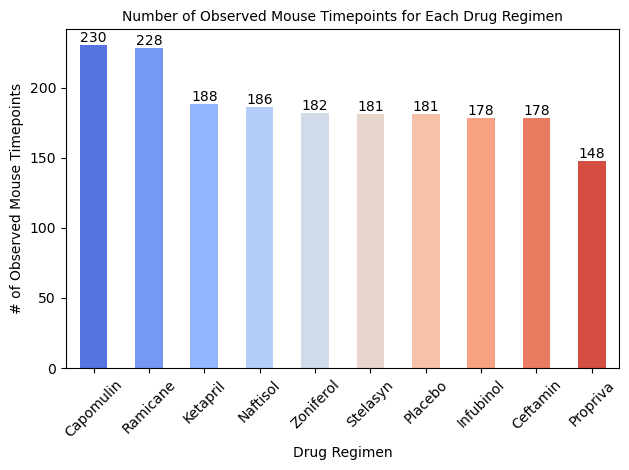

In [56]:
# Imports color_pallets
from seaborn import color_palette
random_colors = color_palette("coolwarm", len(xtimes_drug_used))

# Creates bar chart
ax = xtimes_drug_used.plot.bar(color=random_colors, 
                          rot=45, 
                          legend=False)

# Adds chart elements
plt.title('Number of Observed Mouse Timepoints for Each Drug Regimen', fontsize=10)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=10)
plt.xlabel('Drug Regimen', fontsize=10)
plt.tight_layout()
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Saves the plot as a PNG file in the 'images' folder
output_path = os.path.join('images', 'mice_per_trial_bar.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Visualize the chart
plt.show()


### Gender Distribution per Trial

<Figure size 1200x800 with 0 Axes>

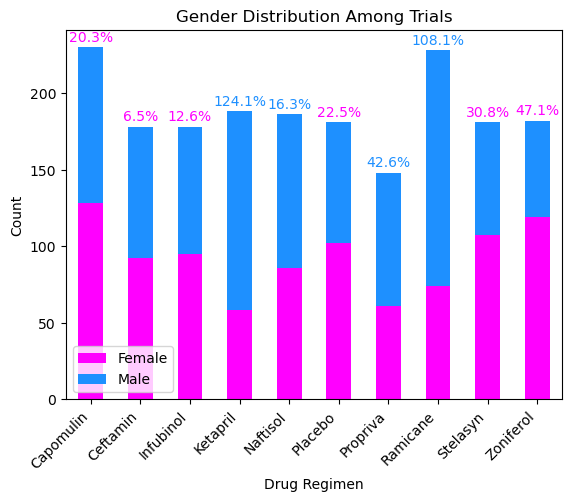

In [57]:
# Groups by "Drug Regimen" and calculates value counts for "Gender" for "Male" and "Female"
grouped_df = complete_results_cleaned.groupby('Drug Regimen')['Sex'].value_counts().unstack()

# Reorder columns to ensure "Female" is fuchsia and "Male" is dodgerblue
grouped_df = grouped_df[['Female', 'Male']]

# Calculates the percentage difference between "Male" and "Female"
percentage_diff = ((grouped_df['Male'] - grouped_df['Female']) / grouped_df['Female']) * 100

# Sets chart size
plt.figure(figsize=(12, 8))

# Plots the stacked bar chart
ax = grouped_df.plot(kind='bar', color=['fuchsia', 'dodgerblue'], stacked=True)

# Adds percentage difference labels on top of the stacked bars
for i, (index, row) in enumerate(grouped_df.iterrows()):
    if percentage_diff[index] < 0:
        ax.text(i, row['Male'] + row ['Female'] + 2, f'{(percentage_diff[index] * -1):.1f}%', ha='center', va='bottom', color='fuchsia')
    if percentage_diff[index] >= 0:
        ax.text(i, row['Male'] + row ['Female'] + 2, f'{percentage_diff[index]:.1f}%', ha='center', va='bottom', color='dodgerblue')

# Adds chart elements
ax.set_title('Gender Distribution Among Trials')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
ax.legend(loc='lower left')

# Saves the chart as a PNG file in the 'images' folder
output_path = os.path.join('images', 'gender_perc_per_trial_stacked.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')


# Visualize the chart
plt.show()

### Gender Distribution for Full Study

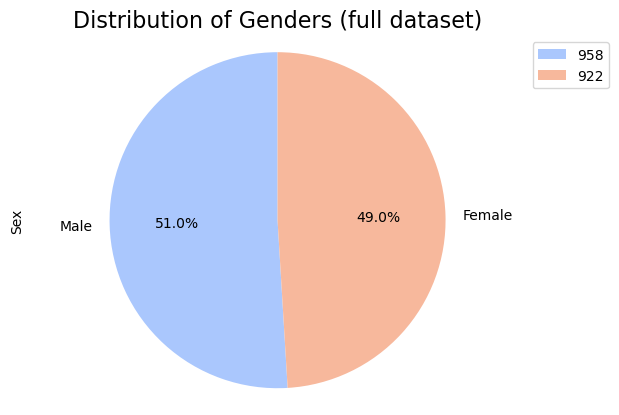

In [58]:
# Grab the Sex series
mf_values = complete_results_cleaned["Sex"].value_counts()

# Assign colors
colors = color_palette("coolwarm", len(mf_values))

# Create a pie chart with custom colors and additional styling
pie_plot = mf_values.plot(kind='pie', 
                          autopct="%1.1f%%", 
                          colors=colors, 
                          startangle=90)

# Add chart elements
plt.title('Distribution of Genders (full dataset)', fontsize=16)
plt.axis('equal')
plt.legend(mf_values, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Save the chart as a PNG file in the 'images' folder
output_path = os.path.join('images', 'gender_distribution_pie.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Viisualse
plt.show()

### Outliers for Ending Tumor Volume

In [59]:
# Gather the final tumor volume of each mouse across each treatment regimen:  

# Getting the last (greatest) timepoint for each mouse
final_timepoint = complete_results_cleaned.groupby('Mouse ID')['Timepoint'].max()

# Merge this grouped df with the original complete_results_cleaned df to get the tumor volume at the last timepoint
complete_with_final_tumor_v = pd.merge(final_timepoint, complete_results_cleaned, on=['Mouse ID','Timepoint'])
complete_with_final_tumor_v

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [60]:
# Visualizes a list of each drug regimen
drug_types = complete_results_cleaned['Drug Regimen'].unique()
drug_types

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [61]:
# Get a list of each drug type
drug_types = complete_results_cleaned['Drug Regimen'].unique()

# Allows for drug types to be excluded from the box-plot analysis.
excluded_treatments = []

# Subtracts excluded_treatments from drug_types
treatments_considered = [item for item in drug_types if item not in excluded_treatments]

# Import scipy methods for finding outliers in the data
from scipy.stats import iqr, zscore

# List to fill with tumor vol data
tumor_vol_data = []

# Calculate the IQR and check for any outliers.
for treatment in treatments_considered:

    # Get tumor volume data for drug regimen
    tumor_volume_per_drug = complete_with_final_tumor_v.loc[complete_with_final_tumor_v['Drug Regimen'] == treatment]["Tumor Volume (mm3)"]

    # Add to list
    tumor_vol_data.append(tumor_volume_per_drug)

    # Calculate quartiles and IQR
    q1, q3 = tumor_volume_per_drug.quantile([0.25, 0.75])
    iqr_value = iqr(tumor_volume_per_drug)

    # Calculate lower and upper bounds
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value

    # Identify outliers using Z-scores
    z_scores = zscore(tumor_volume_per_drug)
    outliers = tumor_volume_per_drug[(z_scores > 3) | (z_scores < -3)]
    




### Visualize Outliers

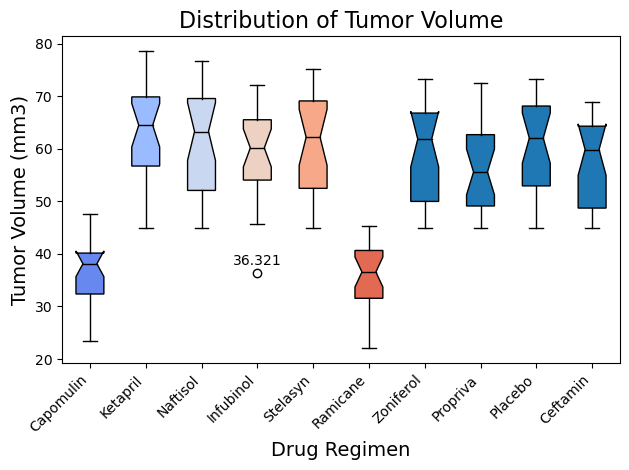

In [62]:
# Use Seaborn color pallet
palette = color_palette("coolwarm")

# Create a boxplot
boxplot = plt.boxplot(tumor_vol_data, 
                      labels=treatments_considered, 
                      notch=True, 
                      patch_artist=True)

plt.title("Distribution of Tumor Volume", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

# Set regimen colors
for patch, color in zip(boxplot['boxes'], palette):
    patch.set_facecolor(color)

# Customize whisker, median, and cap colors
for prop in ['whiskers', 'medians', 'caps']:
    plt.setp(boxplot[prop], color='black')

# Add outlier labels
for i, treatment in enumerate(treatments_considered):
    outliers = boxplot['fliers'][i].get_data()[1]
    for value in outliers:
        plt.text(i + 1, value + 1, f'{value:.3f}', ha='center', va='bottom', color='black')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a PNG file in the 'images' folder
output_path = os.path.join('images', 'final_tumor_vol_box.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')


# Visualize
plt.tight_layout()
plt.show()

## Visualizing Analysis for Selected Mice

### Define Visualization functions

In [63]:
# Define function to generate a timeline of the selected mouse's Weight and Tumor Volume
def tumor_volume_line(dataframe, treatment, mouse_id, variable_y):

    df = dataframe

    # Gather the data for the specific mouse
    filtered_for_plot = df.loc[df['Drug Regimen'] == treatment,:]
    filtered_for_plot = filtered_for_plot.loc[filtered_for_plot["Mouse ID"] == mouse_id,:]

    # Set Seaborn style and color palette
    sns.set(style="whitegrid", palette="coolwarm")

    # Create a line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Timepoint', y=variable_y, data=filtered_for_plot, marker='o')

    # Title, labels, etc.
    plt.title(f"Tumor Volume During {treatment} Regimen for Mouse: " + mouse_id, fontsize=16)
    plt.xlabel("Timepoint", fontsize=14)
    plt.ylabel("Tumor Volume (mm3)", fontsize=14)

    # Save the plot as a PNG file in the 'images' folder
    output_path = os.path.join('images', f'{mouse_id}_tumor_vol_time_line.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')


    # Visualize
    plt.show()

In [64]:
# Define function to generate a Correlation and Regression analysis of the selected mouse's weight and Tumor Volume
def tumor_weight_reg_analysis(dataframe, treatment, mouse_id, variable_x, variable_y):

    df = dataframe

    # Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
    filtered_for_scatter = df.loc[df['Drug Regimen'] == treatment]
    filtered_for_scatter = filtered_for_scatter.groupby(["Mouse ID"])[[variable_y, variable_x]].mean()

    x_axis_scatter = filtered_for_scatter[variable_x]
    y_axis_scatter = filtered_for_scatter[variable_y]

    # Set Seaborn style and color palette
    sns.set(style="whitegrid")

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)', data=filtered_for_scatter, edgecolor='blue', color="dodgerblue", s=100)

    plt.title(f"Weight and Tumor Volume for Regimen: {treatment}", fontsize=16)
    plt.xlabel("Weight (g)", fontsize=14)
    plt.ylabel("Tumor Volume (mm3)", fontsize=14)

    # Save the plot as a PNG file in the 'images' folder
    output_path = os.path.join('images', f'{treatment}_tum_weight_scatter.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    plt.show()

    # Create a regression analysis
    # Calculate regression line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_scatter, y_axis_scatter)
    regress_values = x_axis_scatter * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create a scatter plot overlayed with the regression line 
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_axis_scatter, y=y_axis_scatter, color="dodgerblue", edgecolor='black', s=100)
    plt.plot(x_axis_scatter, regress_values, "r-")

    # Display correlation coefficient as an annotation
    correlation_coefficient = round(st.pearsonr(x_axis_scatter, y_axis_scatter)[0], 2)
    plt.annotate(f'Correlation Coefficient: {correlation_coefficient}', xy=(0.95, 0.05), xycoords='axes fraction', ha='right', fontsize=18, color="black")

    plt.title(f"Regression and Correlation for Regimen: {treatment}", fontsize=16)
    plt.xlabel('Average Weight (g)', fontsize=14)
    plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)

    # Save the plot as a PNG file in the 'images' folder
    output_path = os.path.join('images', f'{mouse_id}_tum_weight_reg_analysis.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')


    plt.show()

In [65]:
# Define function to get the average correlation coefficient of two series in the dataset
def get_average_cc(dataframe, variable_y, variable_x):
    df = dataframe
    correlation_coefficients = []

    # Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
    filtered = df.loc[df['Drug Regimen'] == treatment]
    filtered = filtered.groupby(["Mouse ID"])[[variable_y, variable_x]].mean()

    x_axis= filtered[variable_x]
    y_axis = filtered[variable_y]

    cc = round(st.pearsonr(x_axis, y_axis)[0], 2)

    correlation_coefficients.append(cc)

    print(f"The Average Correlation Coefficient between {variable_x} and {variable_y} for the dataframe is {np.mean(correlation_coefficients)}")

### Define Parameters to Analyze

In [72]:
# Specify which dataframe to use in the following functions
dataframe = complete_results_cleaned

# Specify which treatment and mouse to analyze by ID
treatment = "Capomulin"
mouse_id = "l509"

# Series of the dataframe to analyze 
variable_y = "Tumor Volume (mm3)"
variable_x = "Weight (g)"


### Tumor Volume During Regimen

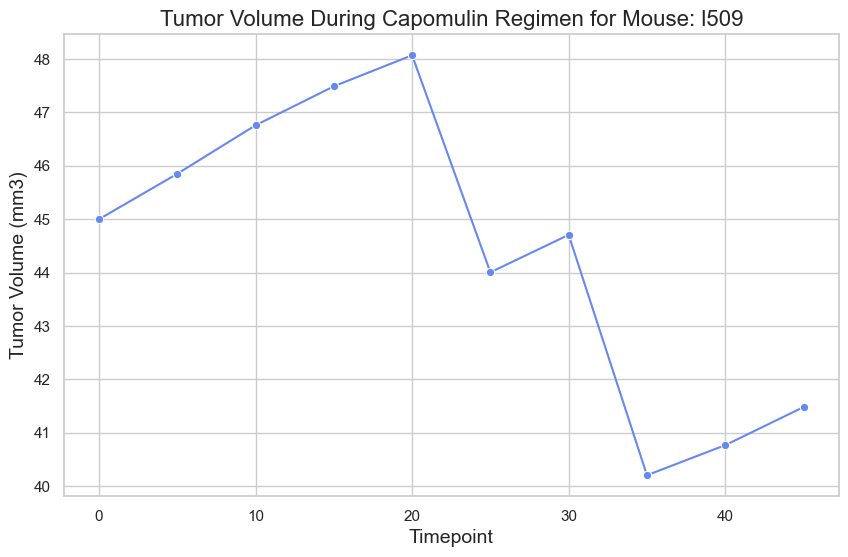

In [67]:
# Gathers a timeline of the specified series of data for the mouse specified. X Axis is always the "Timepoint" series.
tumor_volume_line(dataframe=dataframe, 
                  treatment=treatment, 
                  mouse_id=mouse_id,
                  variable_y=variable_y)

### Weight and Tumor Volume Scatter Plot, Regression, and Correlation Analysis


In [68]:
# Call Average Correlation Coefficient function on the entire dataset based on two selected data series

# Call function
get_average_cc(dataframe=dataframe, 
               variable_x=variable_x, 
               variable_y=variable_y)

The Average Correlation Coefficient between Weight (g) and Tumor Volume (mm3) for the dataframe is 0.84


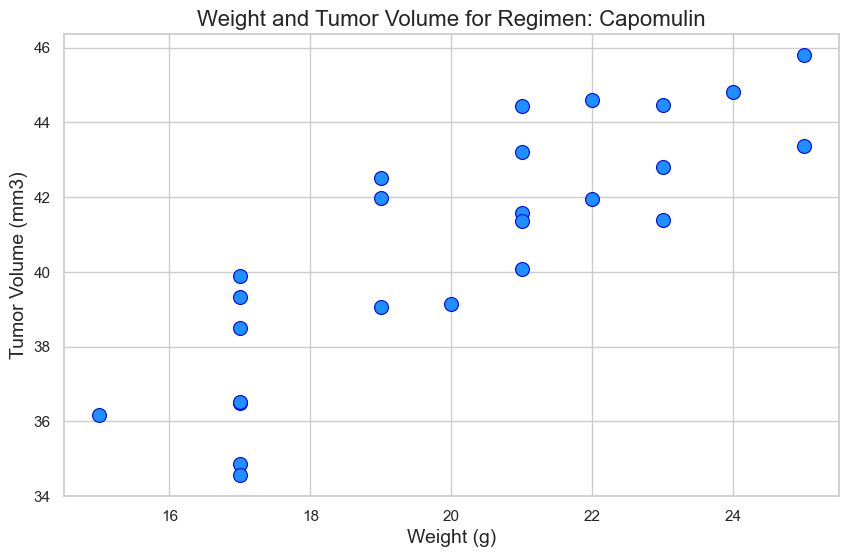

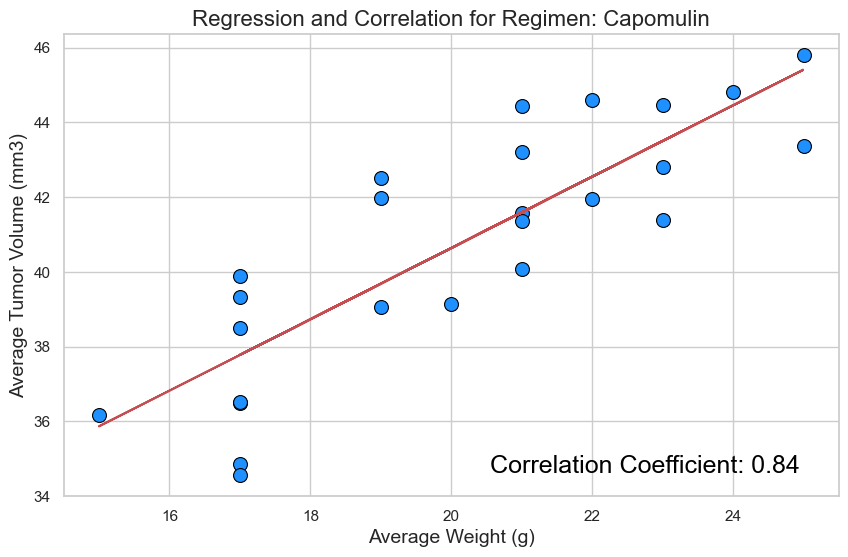

In [73]:
# Call Regression Analysis function
tumor_weight_reg_analysis(dataframe=dataframe, 
                          treatment=treatment, 
                          mouse_id=mouse_id,
                          variable_x=variable_x,
                          variable_y=variable_y)